**Description**
- The project aims to analyze the quality of red wine based on its chemical characteristics. 
- After data loading and preliminary analysis, various machine learning models are investigated to predict wine quality based on its features. 
- Different classification methods are used for comparison, such as KNN, Logistic Regression, Decision Trees, Random Forests, and Gradient Boosting. Each model is evaluated based on quality metrics such as accuracy and AUC-ROC. The results allow selecting the best model for a given task.

**Dataset Description:**
- Number of Records: 1599.
- Number of Features: 18.
- Types of Features: Numerical.

**The dataset includes the following features:**
- Fixed acidity: The amount of acid in the wine that does not evaporate during boiling.
- Volatile acidity: The amount of acetic acid in the wine, which can contribute to unpleasant vinegar-like smells.
- Citric acid: The amount of citric acid in the wine, which can add freshness and fruitiness.
- Residual sugar: The amount of sugar left in the wine after fermentation, influencing its sweetness.
- Chlorides: The amount of salt in the wine, which can be derived from the soil or added during production.
- Free sulfur dioxide: The amount of free SO2 in the wine, serving as an antiseptic and antioxidant.
- Total sulfur dioxide: The total amount of SO2 in the wine, including both free and bound SO2, also serving as a  preservative and antiseptic.
- Density: The density of the wine, measured in g/cm³.
- pH: The pH level of the wine, influencing its acidity or alkalinity.
- Sulphates: The amount of added sulfates, which can also act as an antiseptic and antioxidant.
- Alcohol: The percentage of alcohol in the wine.
- Quality: The quality rating of the wine, typically on a scale from 1 to 10.

**Loading Libraries**

In [527]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import mglearn

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

**Loading Data**

In [528]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [529]:
df.shape


(1599, 12)

In [530]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [531]:
mean_by_quality = df.groupby('quality').mean()
print('Means for Different Values of the Target Variable:')
mean_by_quality

Means for Different Values of the Target Variable:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [532]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


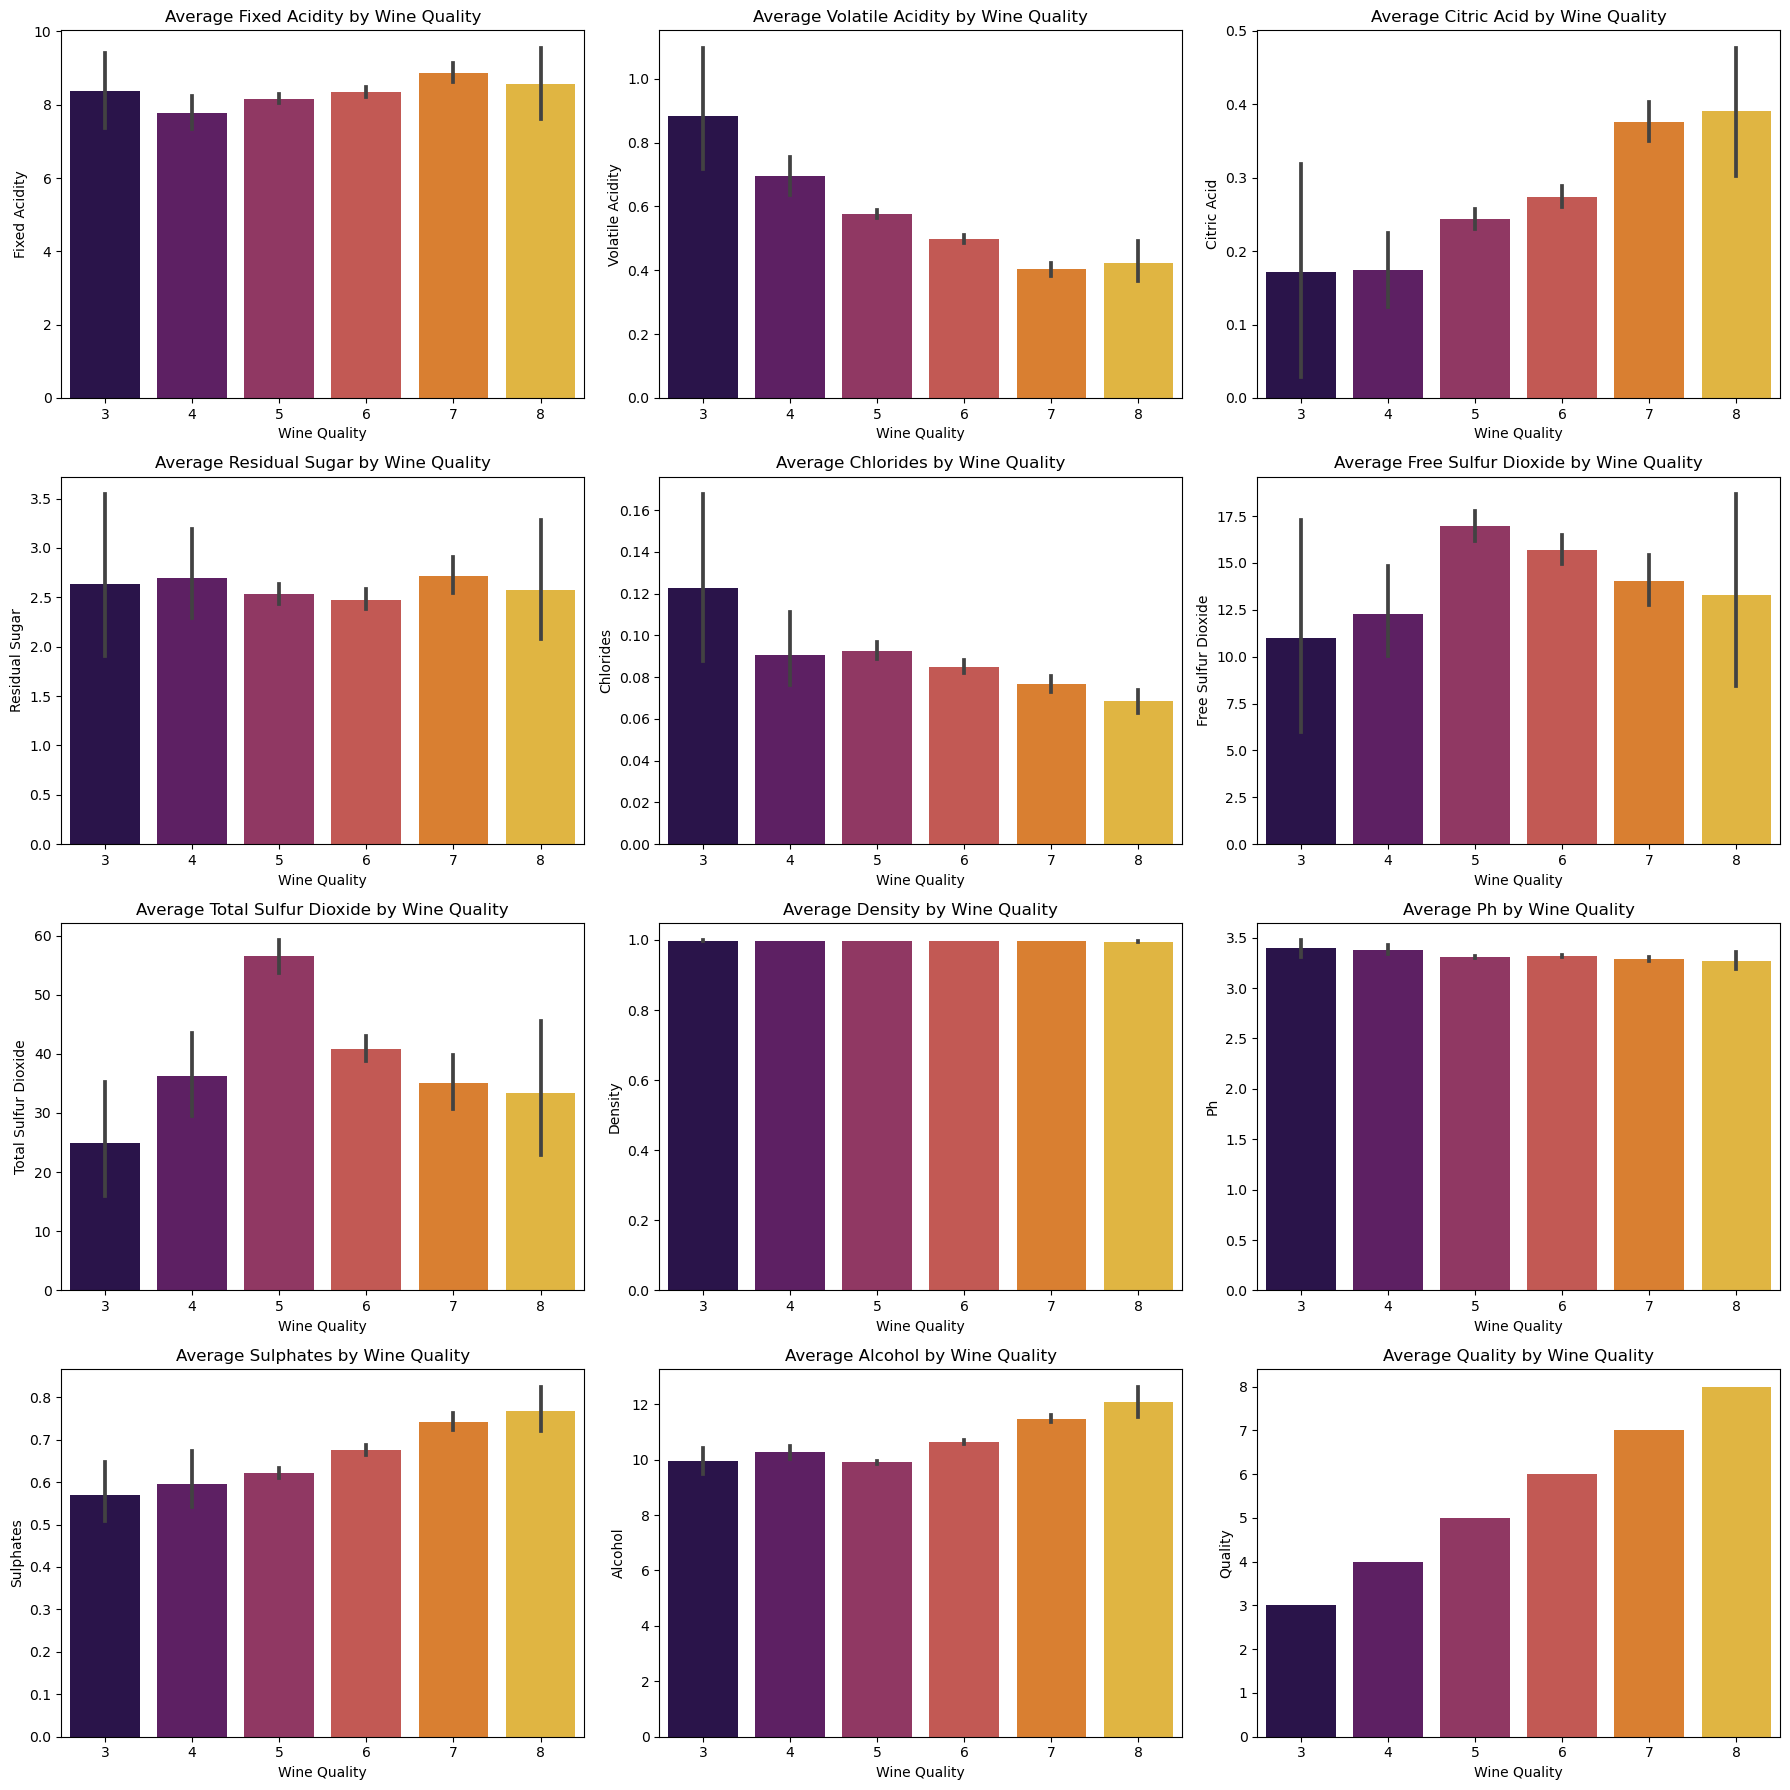

In [533]:
# List of features to create bar plots for
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
            'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# Create a 4x3 grid of subplots for the bar plots
fig, axes = plt.subplots(4, 3, figsize=(18, 18))

# Iterate over each feature and create a bar plot in the corresponding subplot
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    sns.barplot(x='quality', y=feature, data=df, palette='inferno', ax=ax)
    ax.set_xlabel('Wine Quality')
    ax.set_ylabel(feature.replace('_', ' ').title())
    ax.set_title(f'Average {feature.replace("_", " ").title()} by Wine Quality')

plt.tight_layout()
plt.show()

In [534]:
outliers_df = pd.DataFrame()
df_out = df.drop(df.columns[-1], axis=1)

aggregation_functions = {}

for column in df_out.columns:
    outliers = df_out[df_out[column] > df_out[column].mean() + 3 * df_out[column].std()].copy()
    outliers['Outlier_Column'] = column
    outliers_df = pd.concat([outliers_df, outliers])
    aggregation_functions[column] = 'max'

aggregation_functions['Outlier_Column'] = lambda x: ', '.join(x)
outliers_df = outliers_df.groupby(outliers_df.index).agg(aggregation_functions)
outliers_df.sort_values(by='Outlier_Column')




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Outlier_Column
588,5.0,0.420,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,alcohol
144,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,alcohol
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,alcohol
1270,5.0,0.380,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,alcohol
821,4.9,0.420,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,alcohol
...,...,...,...,...,...,...,...,...,...,...,...,...
127,8.1,1.330,0.00,1.8,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,volatile acidity
199,6.9,1.090,0.06,2.1,0.061,12.0,31.0,0.99480,3.51,0.43,11.4,volatile acidity
1312,8.0,1.180,0.21,1.9,0.083,14.0,41.0,0.99532,3.34,0.47,10.5,volatile acidity
724,7.5,1.115,0.10,3.1,0.086,5.0,12.0,0.99580,3.54,0.60,11.2,volatile acidity


In [535]:

df = df.drop(outliers_df.index)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


**EDA**

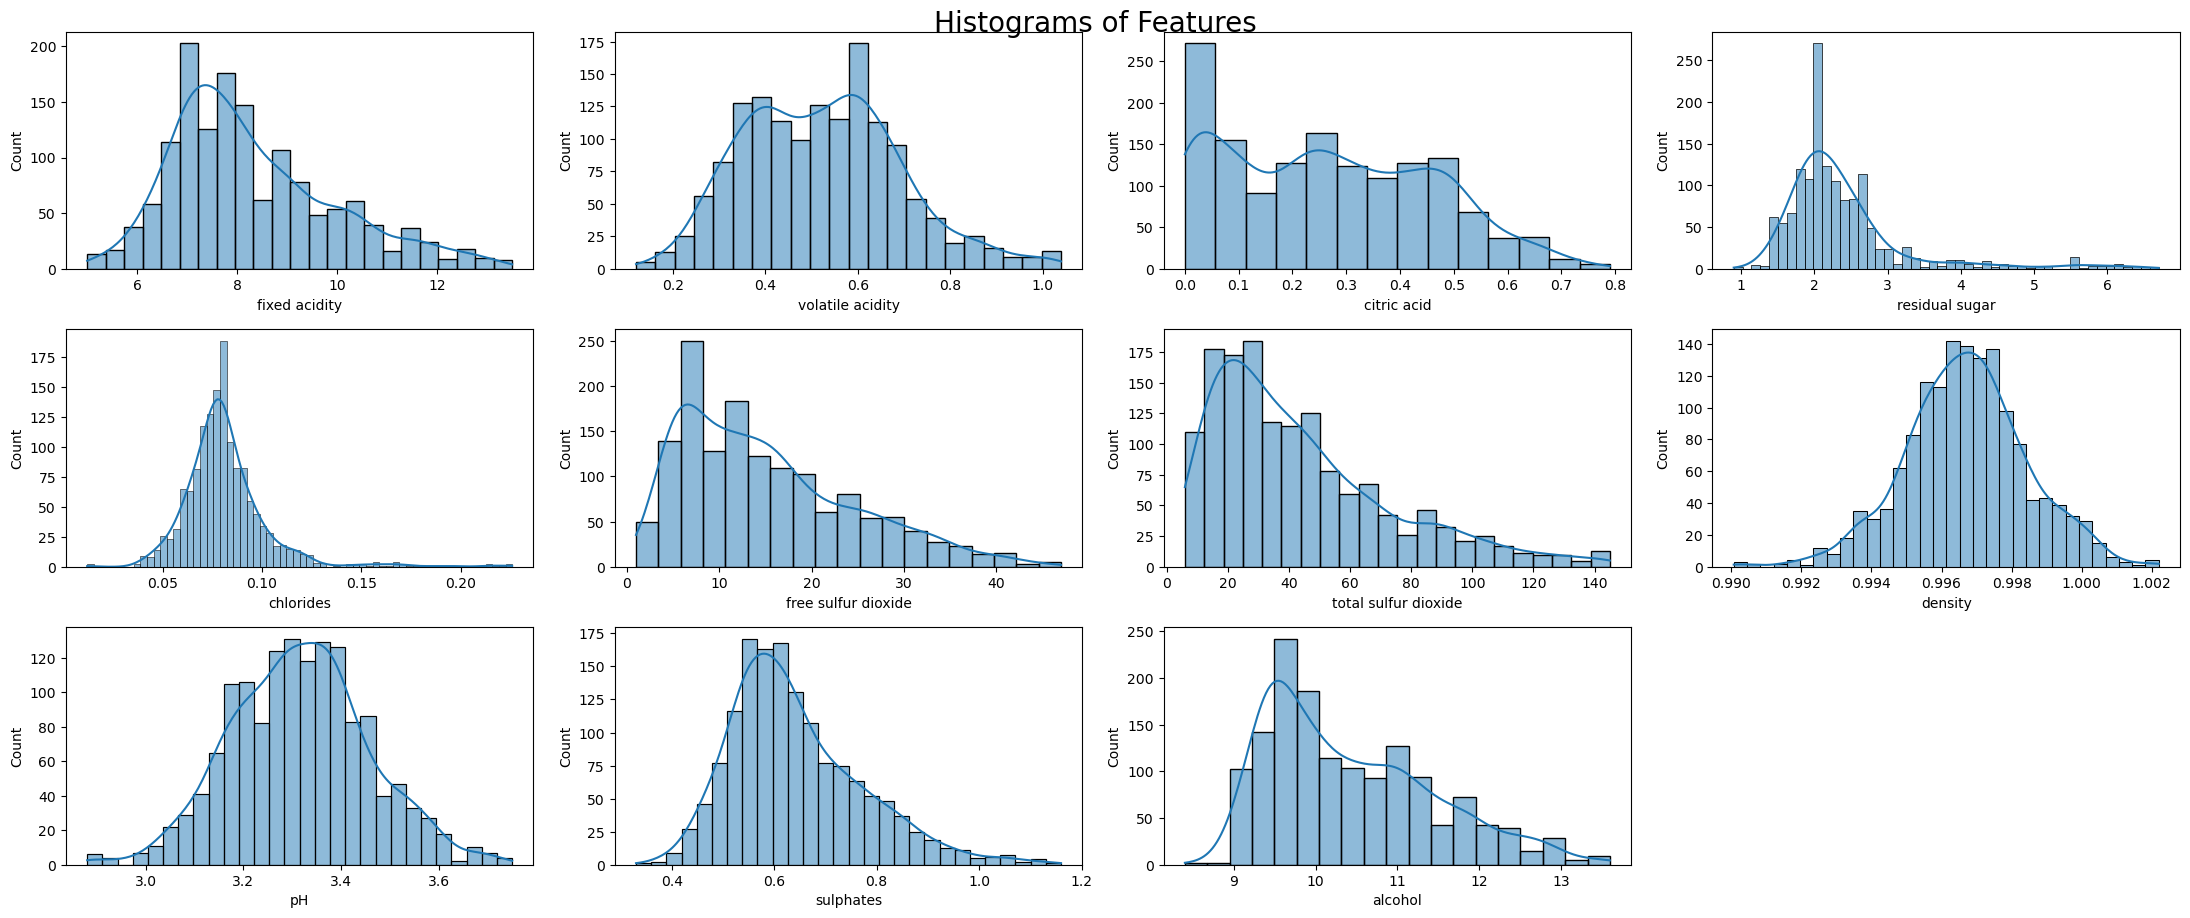

In [536]:
plt.figure(figsize=(22, 18))

for i, column in enumerate(df.columns[:-1]):
    plt.subplot(6, 4, i+1)
    sns.histplot(df[column], kde=True)

plt.suptitle('Histograms of Features', fontsize=20)  
plt.tight_layout()
plt.show()

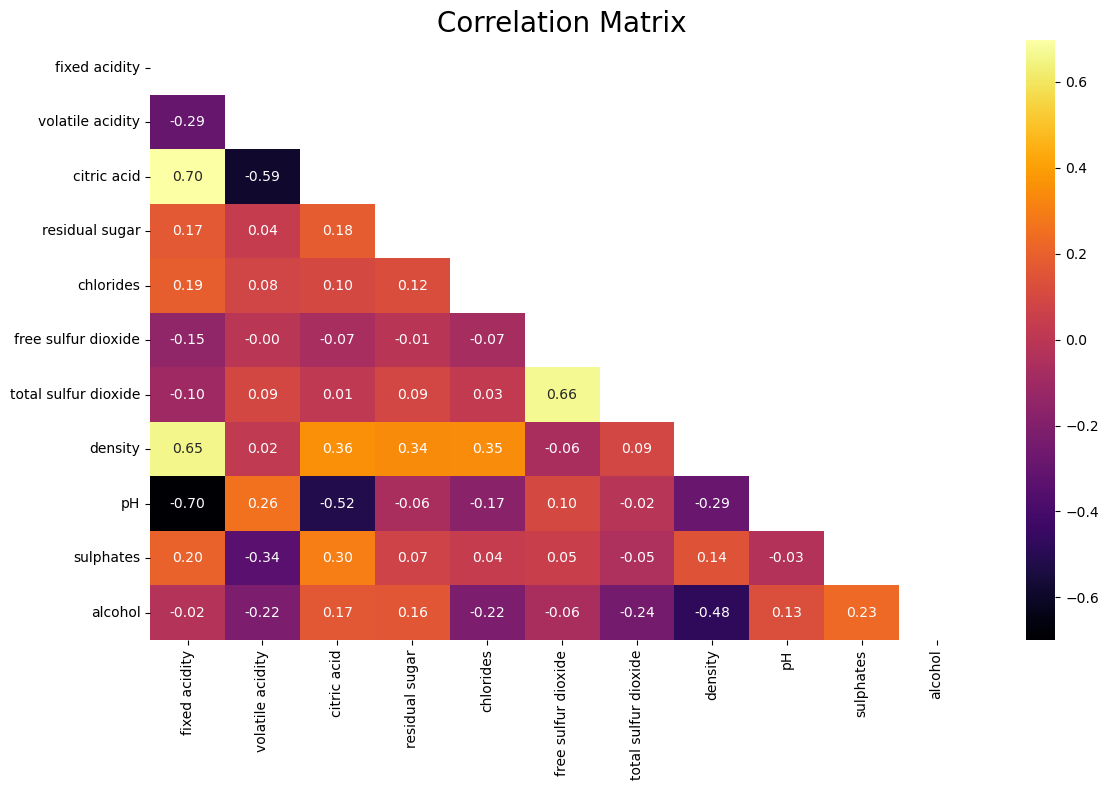

In [537]:
df_corr = df.drop('quality', axis=1)
df_corr = df_corr.corr()

mask = np.triu(np.ones_like(df_corr, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, mask=mask, annot=True, fmt='.2f', cmap='inferno')
plt.title('Correlation Matrix', fontsize=20)
plt.tight_layout()
plt.show()

In [538]:
df['quality'].value_counts()


5    617
6    589
7    187
4     47
8     16
3      7
Name: quality, dtype: int64

For further work, we will convert the "quality" values into a binary format, where values from 3 to 5 will represent low quality (0), and values from 6 to 8 will represent high quality (1).


In [539]:
df['quality'] = np.where(df['quality'] > 5, 1, 0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


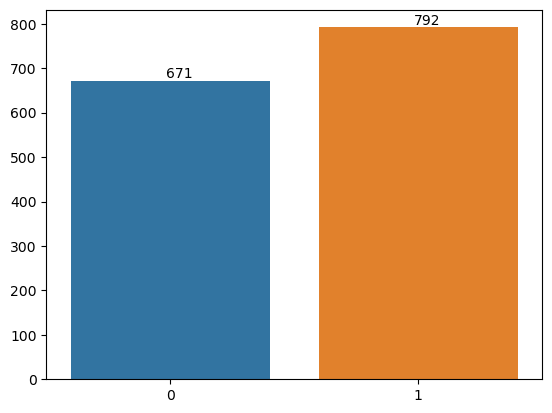

<Figure size 1200x500 with 0 Axes>

In [540]:
quality = df['quality'].value_counts()
bars = sns.barplot(x=quality.index, y=quality.values)

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.1, yval, int(yval), va='bottom', fontsize=10)
plt.figure(figsize=(12, 5))

plt.tight_layout()
plt.show()

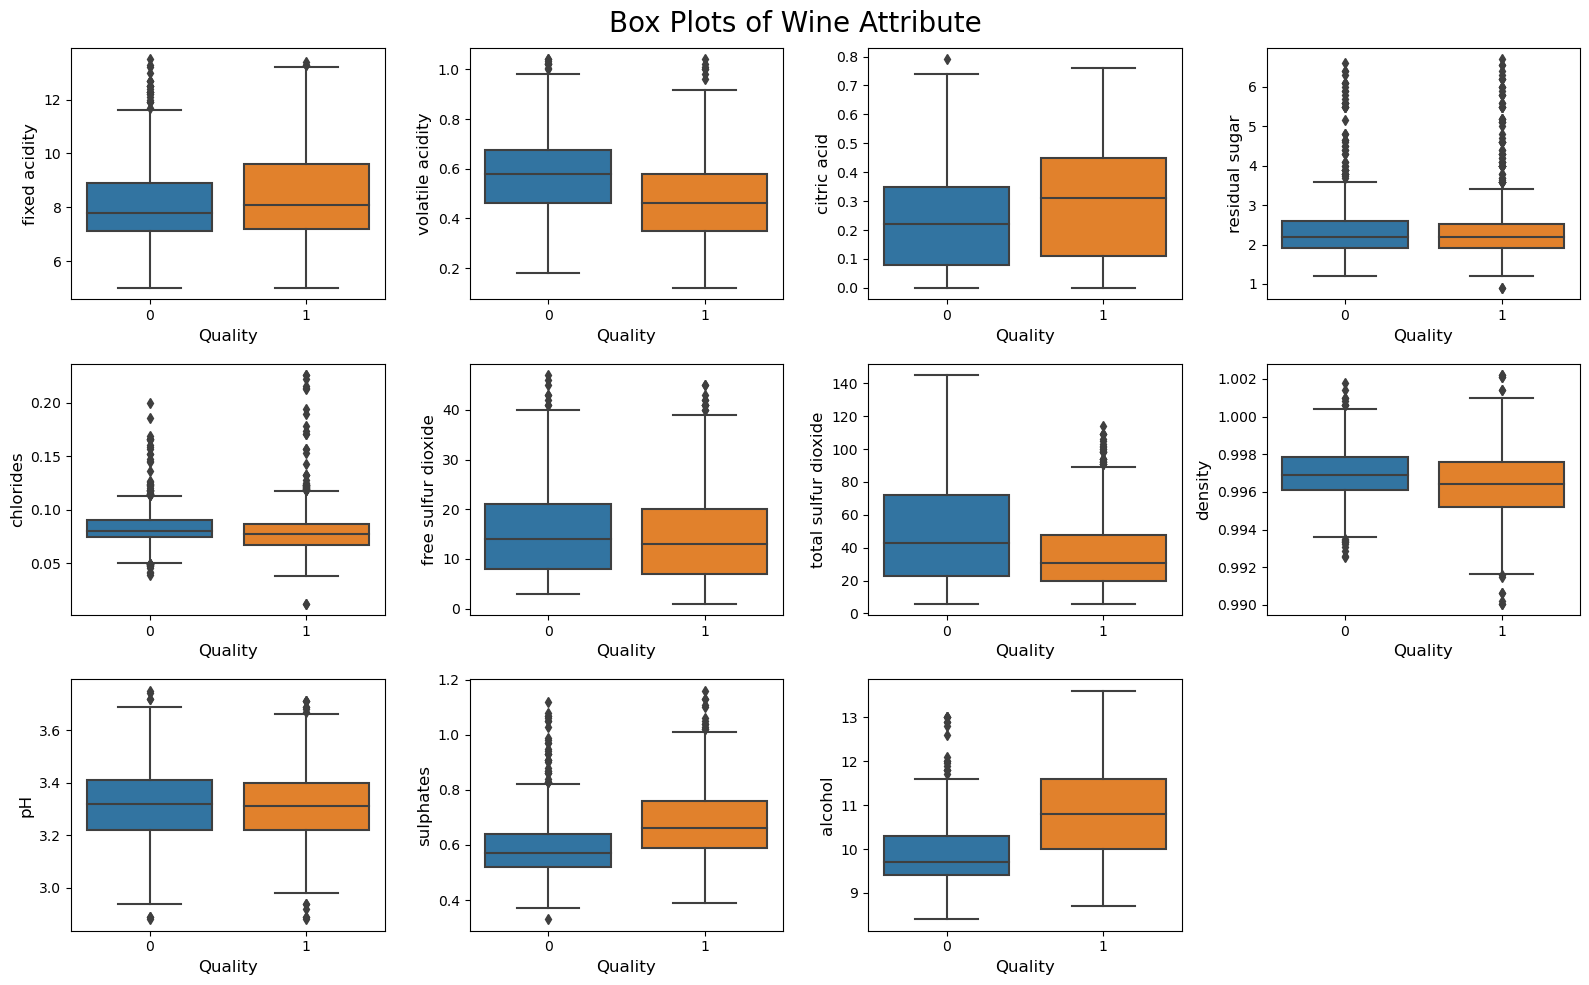

In [541]:
plt.figure(figsize=(16, 10)) 

for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x='quality', y=column, data=df)
    plt.xlabel('Quality', fontsize=12)
    plt.ylabel(f'{column}', fontsize=12)

plt.suptitle('Box Plots of Wine Attribute', fontsize=20)  
plt.tight_layout()
plt.show()

Box Plots provide a graphical summary of the distribution of a dataset, showing the median, quartiles, and outliers. It's useful for comparing distributions across different categories

In [542]:
mean_by_quality = df.groupby('quality').mean()
print('Means for Different Values of the Target Variable:')
mean_by_quality

Means for Different Values of the Target Variable:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
0,8.109538,0.578599,0.230089,2.374590,0.083578,15.710879,51.910581,0.996996,3.321177,0.595306,9.929657
1,8.475505,0.476193,0.295694,2.399369,0.079494,14.686869,37.023990,0.996442,3.310896,0.681199,10.844381


In [543]:
median_by_quality = df.groupby('quality').median()
print('Median for Different Values of the Target Variable:')
median_by_quality

Median for Different Values of the Target Variable:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
0,7.8,0.58,0.22,2.2,0.080,14.0,43.0,0.9969,3.32,0.57,9.7
1,8.1,0.46,0.31,2.2,0.077,13.0,31.0,0.9964,3.31,0.66,10.8


Data Preprocessing

In [544]:
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Due to our data set has a non-normal distribution, we should do scaling using MinMaxScaler.

In [545]:
norm = MinMaxScaler(feature_range = (0, 1))
norm.fit(X_train)
X_train_n = norm.transform(X_train)
X_test_n = norm.transform(X_test)

In [546]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1097, 11)
(366, 11)
(1097,)
(366,)


KNN Classifier

KNN model with top 5 neighbors with minimal train/test accuracy difference

In [547]:
knn_top = pd.DataFrame(columns=['Neighbors', 'Test Accuracies', 'Train Accuracies'])

for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_n, y_train)
    accuracy_test = knn.score(X_test_n, y_test)
    accuracy_train = knn.score(X_train_n, y_train)
    knn_top.loc[len(knn_top)]=[i, accuracy_test, accuracy_train]

knn_top['Train/Test Accuracy Difference'] = abs(knn_top['Train Accuracies'] - knn_top['Test Accuracies'])
knn_top.sort_values(by='Train/Test Accuracy Difference', ascending=True).head().reset_index(drop=True)

,Neighbors,Test Accuracies,Train Accuracies,Train/Test Accuracy Difference
0,13.0,0.740437,0.762990,0.022553
1,10.0,0.751366,0.775752,0.024386
2,16.0,0.734973,0.761167,0.026194
3,30.0,0.740437,0.768459,0.028022
4,25.0,0.734973,0.764813,0.029840


Classification metrics analysis for KNN model

In [548]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train_n, y_train)
y_pred = knn_model.predict(X_test_n)

accuracy_knn = accuracy_score(y_test, y_pred)
print(f'Accuracy of the KNN Model: {accuracy_knn}')

y_prob = knn_model.predict_proba(X_test_n)[:, 1]
auc_score_knn = roc_auc_score(y_test, y_prob)
print(f'AUC score of the KNN Model: {auc_score_knn}')

Accuracy of the KNN Model: 0.7513661202185792
AUC score of the KNN Model: 0.809356367527901


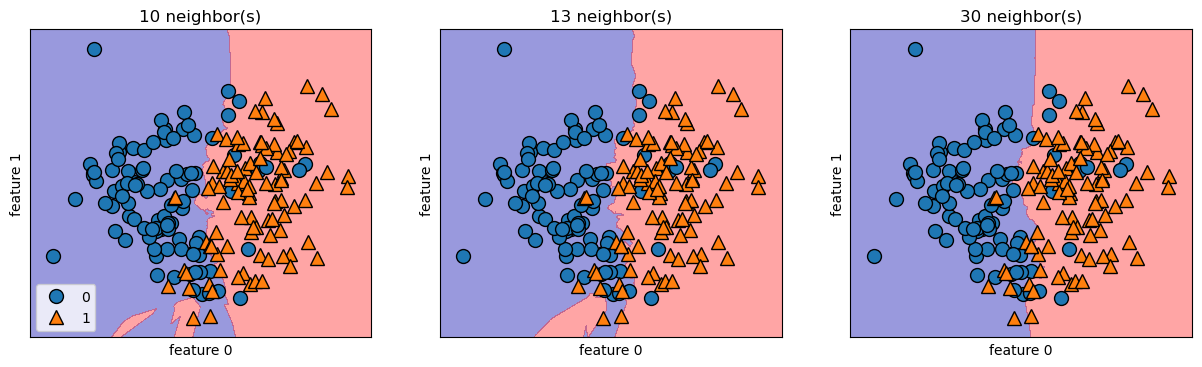

In [549]:

from sklearn.datasets import make_classification

# Dummy data for illustration
# Replace with your actual X_train_n, X_test_n, y_train, y_test
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Plotting decision boundaries for different n_neighbors
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Ensure X and y are numpy arrays for compatibility with mglearn plotting functions
X_plot = np.array(X)
y_plot = np.array(y)

for n_neighbors, ax in zip([10, 13, 30], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_plot, y_plot)
    mglearn.plots.plot_2d_separator(clf, X_plot, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X_plot[:, 0], X_plot[:, 1], y_plot, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

axes[0].legend(loc=3)
plt.show()


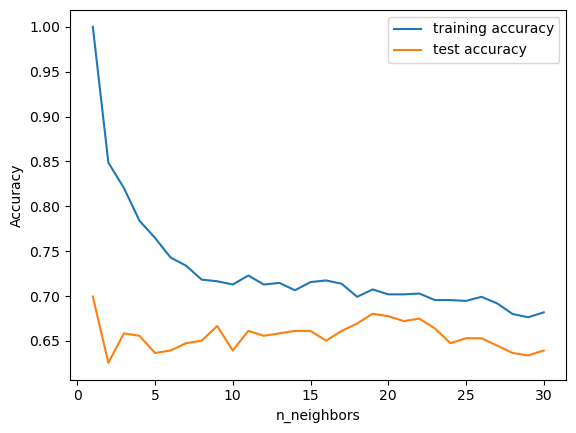

In [550]:

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 31)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

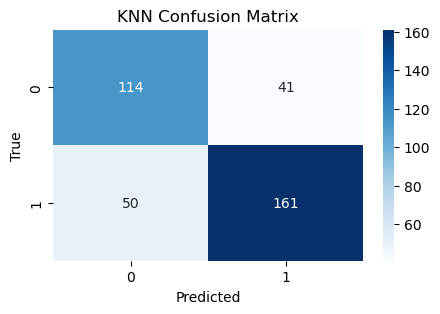

In [551]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title('KNN Confusion Matrix', fontsize=12)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('True', fontsize=10)
plt.show()

In [552]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.74      0.71       155
           1       0.80      0.76      0.78       211

    accuracy                           0.75       366
   macro avg       0.75      0.75      0.75       366
weighted avg       0.75      0.75      0.75       366



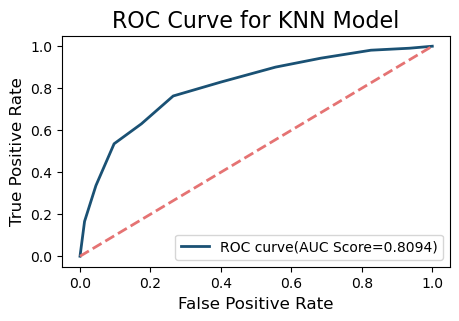

In [553]:
y_prob = knn_model.predict_proba(X_test_n)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='#1a5174', lw=2, label='ROC curve(AUC Score={:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='#e57373', lw=2, linestyle='--')
plt.xlabel('False Positive Rate',  fontsize=12)
plt.ylabel('True Positive Rate',  fontsize=12)
plt.title('ROC Curve for KNN Model', fontsize=16)
plt.legend(loc='lower right', fontsize=10)
plt.show()

Logistics Regression

In [554]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_n, y_train)
y_pred = lr_model.predict(X_test_n)

accuracy_lr = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Logistic Regression Model: {accuracy_lr}')

y_prob = lr_model.predict_proba(X_test_n)[:, 1]
auc_score_lr = roc_auc_score(y_test, y_prob)
print(f'AUC score of the Logistic Regression Model: {auc_score_lr}')

Accuracy of the Logistic Regression Model: 0.7404371584699454
AUC score of the Logistic Regression Model: 0.8047087601284209


In [555]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70       155
           1       0.79      0.75      0.77       211

    accuracy                           0.74       366
   macro avg       0.74      0.74      0.74       366
weighted avg       0.74      0.74      0.74       366



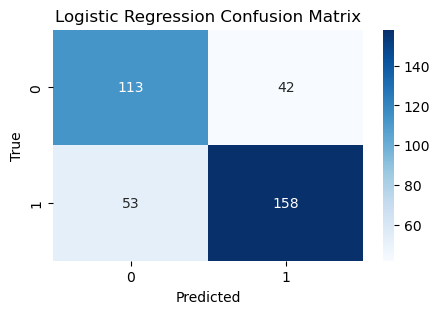

In [556]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title('Logistic Regression Confusion Matrix', fontsize=12)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('True', fontsize=10)
plt.show()

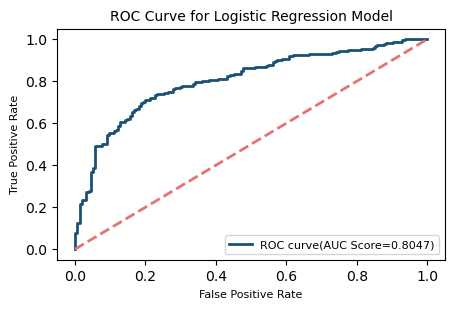

In [557]:
y_prob = lr_model.predict_proba(X_test_n)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,3))
plt.plot(fpr, tpr, color='#1a5174', lw=2, label='ROC curve(AUC Score={:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='#e57373', lw=2, linestyle='--')
plt.xlabel('False Positive Rate',  fontsize=8)
plt.ylabel('True Positive Rate',  fontsize=8)
plt.title('ROC Curve for Logistic Regression Model', fontsize=10)
plt.legend(loc='lower right', fontsize=8)
plt.show()

In [561]:

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame with your training data
X_train_df = pd.DataFrame(X_train, columns=X_train.columns)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]

print(vif_data)



                 Feature          VIF
0          fixed acidity    85.349721
1       volatile acidity    19.483389
2            citric acid     8.903026
3         residual sugar    10.016867
4              chlorides    16.445160
5    free sulfur dioxide     6.901883
6   total sulfur dioxide     6.823754
7                density  1721.185356
8                     pH  1299.349895
9              sulphates    30.613765
10               alcohol   142.296818


In [572]:
import statsmodels.api as sm
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Create a DataFrame with your training data
X_train_df = pd.DataFrame(X_train, columns=X_train.columns)

# Add a constant (intercept) to the model
X_train_const = sm.add_constant(X_train_df)

# Initial logistic regression model with all features
model = sm.Logit(y_train, X_train_const).fit()
print(model.summary())

# Stepwise selection: backward elimination based on p-value
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        
        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit(disp=0)
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Add {best_feature} with p-value {best_pval}')
        
        # Backward step
        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit(disp=0)
        pvalues = model.pvalues.iloc[1:]  # Exclude intercept p-value
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            changed = True
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval}')
        
        if not changed:
            break
    
    return included

# Apply stepwise selection to the training data
selected_features = stepwise_selection(X_train_df, y_train)
print('Final selected features:')
print(selected_features)

# Fit the final logistic regression model with selected features
X_train_selected = X_train_df[selected_features]
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_selected, y_train)



# Evaluate the final model
X_test_df = pd.DataFrame(X_test, columns=X_train.columns)
X_test_selected = X_test_df[selected_features]
y_pred_st = lr_model.predict(X_test_selected)

accuracy_lr1 = accuracy_score(y_test, y_pred_st)
print(f'Accuracy of the Logistic Regression Model: {accuracy_lr1}')

y_prob = lr_model.predict_proba(X_test_selected)[:, 1]
auc_score_lr1 = roc_auc_score(y_test, y_prob)
print(f'AUC score of the Logistic Regression Model: {auc_score_lr1}')



Optimization terminated successfully.
         Current function value: 0.508766
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 1097
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                           11
Date:                Wed, 22 May 2024   Pseudo R-squ.:                  0.2641
Time:                        21:38:04   Log-Likelihood:                -558.12
converged:                       True   LL-Null:                       -758.46
Covariance Type:            nonrobust   LLR p-value:                 4.394e-79
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   42.8343    104.107      0.411      0.681    -161.211     246.879

In [571]:
# Fit the final logistic regression model with selected features using statsmodels
X_train_selected = sm.add_constant(X_train_df[selected_features])
logit_model = sm.Logit(y_train, X_train_selected).fit()

# Print the summary of the model
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.511172
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 1097
Model:                          Logit   Df Residuals:                     1091
Method:                           MLE   Df Model:                            5
Date:                Wed, 22 May 2024   Pseudo R-squ.:                  0.2607
Time:                        21:37:54   Log-Likelihood:                -560.76
converged:                       True   LL-Null:                       -758.46
Covariance Type:            nonrobust   LLR p-value:                 2.909e-83
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -10.1018      1.025     -9.854      0.000     -12.111      -8.093

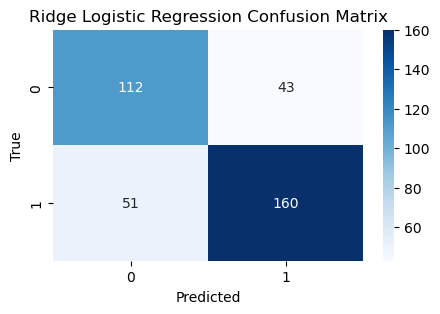

In [568]:
conf_matrix = confusion_matrix(y_test, y_pred_st)

plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title('Ridge Logistic Regression Confusion Matrix', fontsize=12)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('True', fontsize=10)
plt.show()

In [ ]:
# Logistic Regression with L2 (Ridge) regularization
ridge_logistic = LogisticRegression(penalty='l2', solver='liblinear')
ridge_logistic.fit(X_train, y_train)
y_pred_ridge = ridge_logistic.predict(X_test)
print("Ridge Logistic Regression Report:\n", classification_report(y_test, y_pred_ridge))


accuracy_r = accuracy_score(y_test, y_pred_ridge)
print(f'Accuracy of the Logistic Regression Model: {accuracy_r}')

y_prob = ridge_logistic.predict_proba(X_test_n)[:, 1]
auc_score_ridge = roc_auc_score(y_test, y_prob)
print(f'AUC score of the Ridge Logistic Regression Model: {auc_score_ridge}')



Ridge Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.70      0.74      0.71       155
           1       0.80      0.76      0.78       211

    accuracy                           0.75       366
   macro avg       0.75      0.75      0.75       366
weighted avg       0.75      0.75      0.75       366

Accuracy of the Logistic Regression Model: 0.7513661202185792
AUC score of the Ridge Logistic Regression Model: 0.7868827396422565


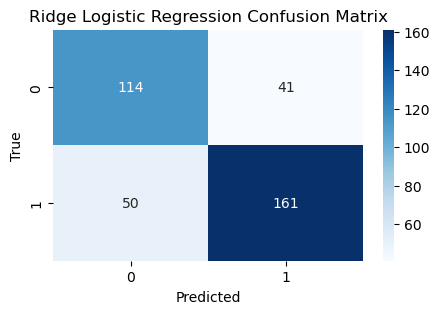

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_ridge)

plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title('Ridge Logistic Regression Confusion Matrix', fontsize=12)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('True', fontsize=10)
plt.show()

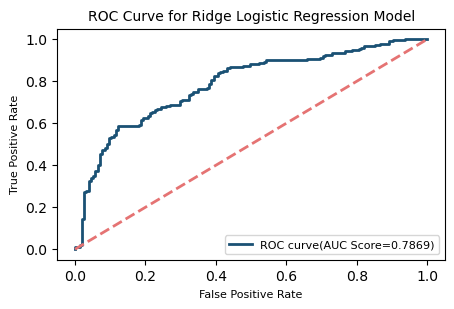

In [ ]:
y_prob = ridge_logistic.predict_proba(X_test_n)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,3))
plt.plot(fpr, tpr, color='#1a5174', lw=2, label='ROC curve(AUC Score={:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='#e57373', lw=2, linestyle='--')
plt.xlabel('False Positive Rate',  fontsize=8)
plt.ylabel('True Positive Rate',  fontsize=8)
plt.title('ROC Curve for Ridge Logistic Regression Model', fontsize=10)
plt.legend(loc='lower right', fontsize=8)
plt.show()

In [ ]:

# Logistic Regression with L1 (Lasso) regularization
lasso_logistic = LogisticRegression(penalty='l1', solver='liblinear')
lasso_logistic.fit(X_train, y_train)
y_pred_lasso = lasso_logistic.predict(X_test)
print("Lasso Logistic Regression Report:\n", classification_report(y_test, y_pred_lasso))

accuracy_la = accuracy_score(y_test, y_pred_lasso)
print(f'Accuracy of the Logistic Regression Model: {accuracy_la}')

y_prob = lasso_logistic.predict_proba(X_test_n)[:, 1]
auc_score_lasso = roc_auc_score(y_test, y_prob)
print(f'AUC score of the Ridge Logistic Regression Model: {auc_score_lasso}')

Lasso Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.70      0.74      0.71       155
           1       0.80      0.76      0.78       211

    accuracy                           0.75       366
   macro avg       0.75      0.75      0.75       366
weighted avg       0.75      0.75      0.75       366

Accuracy of the Logistic Regression Model: 0.7513661202185792
AUC score of the Ridge Logistic Regression Model: 0.7826937777098302


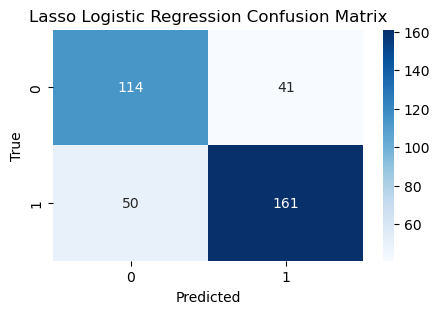

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_lasso)

plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title('Lasso Logistic Regression Confusion Matrix', fontsize=12)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('True', fontsize=10)
plt.show()

**Decision Tree Classifier**
Best Parameters for Decision Tree model

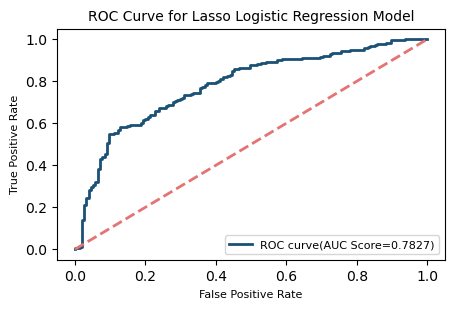

In [ ]:
y_prob = lasso_logistic.predict_proba(X_test_n)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,3))
plt.plot(fpr, tpr, color='#1a5174', lw=2, label='ROC curve(AUC Score={:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='#e57373', lw=2, linestyle='--')
plt.xlabel('False Positive Rate',  fontsize=8)
plt.ylabel('True Positive Rate',  fontsize=8)
plt.title('ROC Curve for Lasso Logistic Regression Model', fontsize=10)
plt.legend(loc='lower right', fontsize=8)
plt.show()

In [ ]:
dt_model = DecisionTreeClassifier(criterion='gini', random_state=42)

parameters = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'min_samples_leaf': [2, 1, 3, 4, 6, 10, 20],
    'min_samples_split': [3, 2, 4, 5, 10, 20]
}

bp_dt = GridSearchCV(dt_model, parameters, n_jobs=-1, cv=10)
bp_dt.fit(X_train, y_train)
print('Best Parameters:', bp_dt.best_params_)

Best Parameters: {'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 3}


Classification metrics analysis for Decision Tree model

In [ ]:
best_model_dt = bp_dt.best_estimator_
best_model_dt.fit(X_train, y_train)
y_pred = best_model_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Decision Tree Model: {accuracy_dt}')

y_prob = best_model_dt.predict_proba(X_test)[:, 1]
auc_score_dt = roc_auc_score(y_test, y_prob)
print(f'AUC score of the Decision Tree Model: {auc_score_dt}')

Accuracy of the Decision Tree Model: 0.7185792349726776
AUC score of the Decision Tree Model: 0.7730316465372266


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       155
           1       0.77      0.73      0.75       211

    accuracy                           0.72       366
   macro avg       0.71      0.72      0.71       366
weighted avg       0.72      0.72      0.72       366



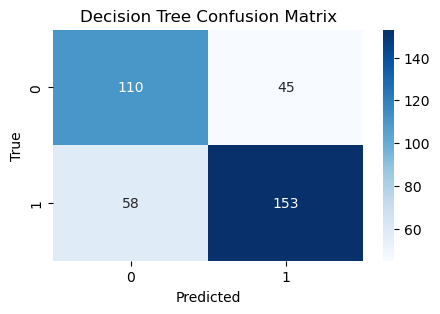

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title('Decision Tree Confusion Matrix', fontsize=12)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('True', fontsize=10)
plt.show()

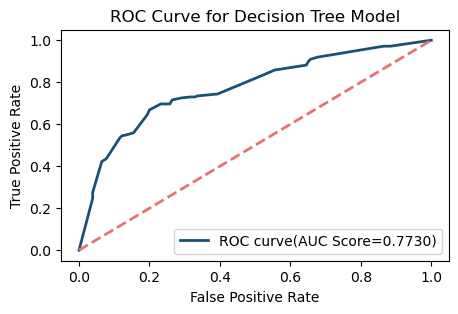

In [ ]:
y_prob = best_model_dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,3))
plt.plot(fpr, tpr, color='#1a5174', lw=2, label='ROC curve(AUC Score={:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='#e57373', lw=2, linestyle='--')
plt.xlabel('False Positive Rate',  fontsize=10)
plt.ylabel('True Positive Rate',  fontsize=10)
plt.title('ROC Curve for Decision Tree Model', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.show()

Feature importance for Decision Tree model.

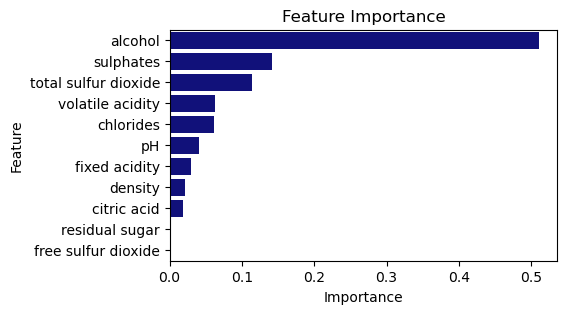

In [ ]:
feature_importance = best_model_dt.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(5, 3))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='darkblue')
plt.title('Feature Importance')
plt.show()

**Random Forest Classifier**

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

parameters = {
    'max_depth': [2, 5, 8, 10],
    'max_features': [2, 5, 8],
    'n_estimators': [10, 100, 500],
    'min_samples_split': [2, 5, 10]
}

bp_rf = GridSearchCV(rf_model, parameters, n_jobs=-1, cv=10)
bp_rf.fit(X_train, y_train)
print('Best Parameters:', bp_rf.best_params_)

Best Parameters: {'max_depth': 10, 'max_features': 5, 'min_samples_split': 5, 'n_estimators': 500}


In [ ]:
np.sqrt(18)

4.242640687119285

Max_features = 5, shows that there's no overfitting 

Classification metrics analysis for Random Forest model

In [ ]:
best_model_rf = bp_rf.best_estimator_
best_model_rf.fit(X_train, y_train)
y_pred = best_model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Test Accuracy of the Random Forest Model: {accuracy_rf}')

y_prob = best_model_rf.predict_proba(X_test)[:, 1]
auc_score_rf = roc_auc_score(y_test, y_prob)
print(f'AUC score of the Random Forest Model: {auc_score_rf}')

Test Accuracy of the Random Forest Model: 0.8087431693989071
AUC score of the Random Forest Model: 0.8678795291239871


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       155
           1       0.85      0.82      0.83       211

    accuracy                           0.81       366
   macro avg       0.80      0.81      0.81       366
weighted avg       0.81      0.81      0.81       366



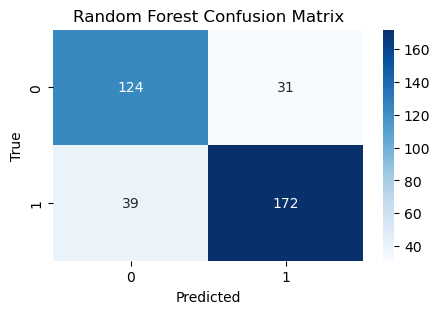

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title('Random Forest Confusion Matrix', fontsize=12)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('True', fontsize=10)
plt.show()

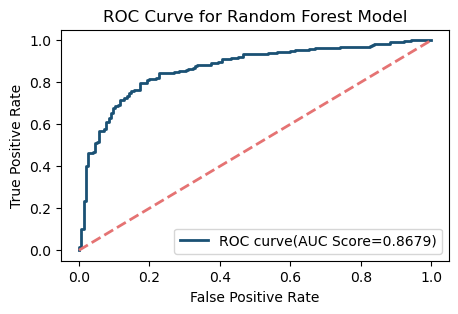

In [ ]:
y_prob = best_model_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,3))
plt.plot(fpr, tpr, color='#1a5174', lw=2, label='ROC curve(AUC Score={:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='#e57373', lw=2, linestyle='--')
plt.xlabel('False Positive Rate',  fontsize=10)
plt.ylabel('True Positive Rate',  fontsize=10)
plt.title('ROC Curve for Random Forest Model', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.show()

Feature importance for Random Forest model.

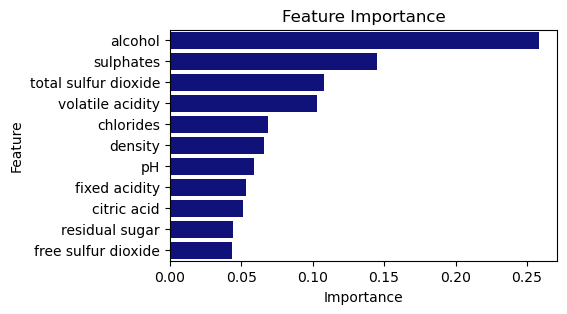

In [ ]:
feature_importance = best_model_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(5,3))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='darkblue')
plt.title('Feature Importance')
plt.show()

Let’s visualize the decision boundaries learned by each tree, together with their aggregate prediction as made by the forest

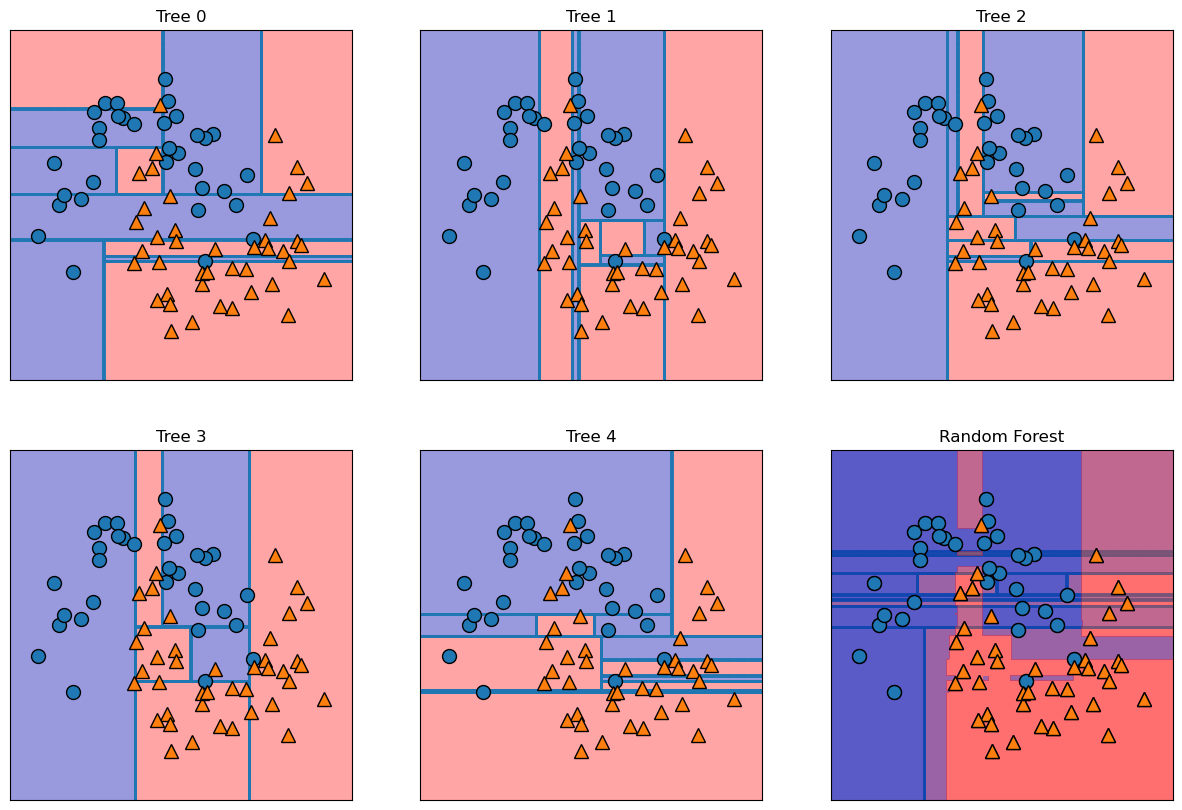

In [ ]:
import matplotlib.pyplot as plt
import mglearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate a toy dataset
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train a RandomForestClassifier
bp_rf = RandomForestClassifier(n_estimators=6, random_state=42)
bp_rf.fit(X_train, y_train)

# Extract individual trees
best_model_rf = bp_rf.estimators_

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), best_model_rf)):
    ax.set_title(f"Tree {i}")
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

# Plot the decision boundary of the RandomForest
mglearn.plots.plot_2d_separator(bp_rf, X_train, fill=True, ax=axes[-1, -1], alpha=0.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.show()


**Gradient Boosting Machines (GBM) Classifier**
Best Parameters for GBM model

In [ ]:
gbm_model = GradientBoostingClassifier(random_state=42)

parameters = {'learning_rate': [0.005, 0.008, 0.1, 0.15],
              'n_estimators': [80, 100, 150, 200],
              'max_depth': [1,2, 3, 4],
              'min_samples_split': [2, 3, 4]}

bp_gbm = GridSearchCV(gbm_model, parameters, n_jobs=-1, cv=10)
bp_gbm.fit(X_train, y_train)
print('Best Parameters:', bp_gbm.best_params_)

Best Parameters: {'learning_rate': 0.005, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 80}


Classification metrics analysis for GBM model

In [ ]:
best_model_gbm = bp_gbm.best_estimator_
best_model_gbm.fit(X_train, y_train)
y_pred = best_model_gbm.predict(X_test)

accuracy_gbm = accuracy_score(y_test, y_pred)
print(f'Test Accuracy of the GBM Model: {accuracy_gbm}')

y_prob = best_model_gbm.predict_proba(X_test)[:, 1]
auc_score_gbm = roc_auc_score(y_test, y_prob)
print(f'AUC score of the GBM Model: {auc_score_gbm}')

Test Accuracy of the GBM Model: 0.92
AUC score of the GBM Model: 0.9852941176470588


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.80      1.00      0.89         8

    accuracy                           0.92        25
   macro avg       0.90      0.94      0.91        25
weighted avg       0.94      0.92      0.92        25



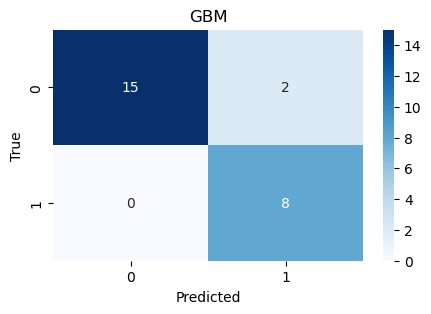

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=sorted(np.unique(y_test)), yticklabels=sorted(np.unique(y_test)))
plt.title('GBM', fontsize=12)
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('True', fontsize=10)
plt.show()

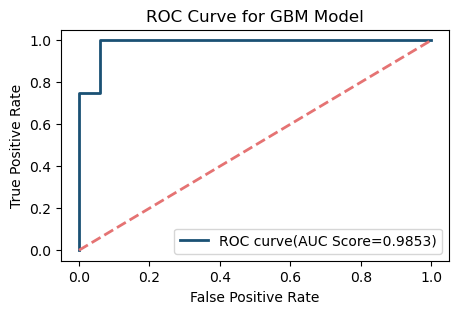

In [ ]:
y_prob = best_model_gbm.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,3))
plt.plot(fpr, tpr, color='#1a5174', lw=2, label='ROC curve(AUC Score={:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='#e57373', lw=2, linestyle='--')
plt.xlabel('False Positive Rate',  fontsize=10)
plt.ylabel('True Positive Rate',  fontsize=10)
plt.title('ROC Curve for GBM Model', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.show()

**Comparing 8 different classification algorithms.**

In [565]:
results_df = pd.DataFrame(columns=['Algorithm', 'Recall score'])

results = [
    ('KNN', accuracy_knn, auc_score_knn),
    ('Logistic Regression', accuracy_lr, auc_score_lr),
 ('Stepwise Logistic Regression', accuracy_lr1, auc_score_lr1),
    ('Ridge Logistic Regression', accuracy_r, auc_score_ridge),
    ('Lasso Logistic Regression', accuracy_la, auc_score_lasso),
    ('Decision Tree', accuracy_dt, auc_score_dt),
    ('Random Forest', accuracy_rf, auc_score_rf),
    ('GBM', accuracy_gbm, auc_score_gbm)

]

results_df = pd.DataFrame(results, columns=['Algorithm', 'Accuracy score', 'AUC score'])
results_df.sort_values(by=['Accuracy score', 'AUC score'], ascending=False).reset_index(drop=True)

,Algorithm,Accuracy score,AUC score
0,GBM,0.920000,0.985294
1,Random Forest,0.808743,0.867880
2,KNN,0.751366,0.809356
3,Ridge Logistic Regression,0.751366,0.786883
4,Lasso Logistic Regression,0.751366,0.782694
5,Logistic Regression,0.743169,0.799603
6,Stepwise Logistic Regression,0.743169,0.799603
7,Decision Tree,0.718579,0.773032


Based on the analysis, it's evident that GBM (Gradient Boosting Machine) outperforms all other algorithms with an impressive accuracy score of 92.00% and the highest AUC score of 0.985. This indicates GBM's exceptional ability to both classify instances correctly and distinguish between positive and negative cases in the classification task.

Following GBM, Random Forest demonstrates strong performance with an accuracy score of 80.87% and an AUC score of 0.868. While Random Forest falls short of GBM in terms of AUC score, it still exhibits robust classification capabilities and stands as a reliable choice for classification tasks.

KNN (K-Nearest Neighbors) follows with a respectable accuracy score of 75.14% and an AUC score of 0.809. Although KNN's performance is slightly lower compared to GBM and Random Forest, it remains competitive and offers a straightforward approach to classification.

Ridge and Lasso Logistic Regression, along with Logistic Regression and it dimensional reduced model (Stepwise model), yield similar accuracy scores around 75%, with AUC scores ranging from 0.783 to 0.787. While logistic regression and Stepwise models provide decent classification performance, they are surpassed by GBM, Random Forest, and KNN in terms of accuracy and AUC score.

Lastly, Decision Tree trails behind with the lowest accuracy score of 71.86% and an AUC score of 0.773. Decision Tree's comparatively lower performance highlights its limitations in capturing complex relationships within the data and generalizing to unseen instances effectively.

In conclusion, GBM emerges as the top-performing algorithm, offering the highest accuracy and AUC scores. However, the selection of the most suitable algorithm depends on various factors such as interpretability, computational efficiency, and specific requirements of the classification task.